# Using multiple kernels in Jupyter
If you've used a Jupyter notebook, you've used a kernel. A kernel is a process that executes code from a front-end process. Usually, if you are working in Python, the kernel you use is the IPython kernel. The IPython kernel usually matches the Python version and contains the same libraries as the process running the Jupyter notebook process. However, you can use multiple kernels in Jupyter. This article will explain how you can install and use new kernels, as well as give examples of how this can be useful.

### The default setup
There are [multiple ways](https://www.wrighters.io/4-ways-to-run-jupyter-notebooks/) to run Jupyter notebooks, but if you are using the classic [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/) or the [JupyterLab](https://jupyterlab.readthedocs.io/en/latest/) servers as your environment, you will typically create a setup where the Jupyter code and your own notebook code will use the same Python environment. But this is not a requirement of the architecture. To demonstate this, I'll walk you through the setup of basic environment.

### Initial setup
You have many choices for setting up Python on your workstation. I recommended using [pyenv](https://www.wrighters.io/use-pyenv-and-virtual-environments-to-manage-python-complexity/) or [anaconda](https://www.anaconda.com/products/distribution). If you want to follow along, first create a virtual environment using either of those tools first (or use another tool if you have a preferred way to setup virtual environments).

### Create the environment
Here, I'll create virtualenv for the demo. It will use Python 3.10.4 and I'll call it `kernels`.
```
$ pyenv virtualenv 3.10.4 kernels
$ pyenv activate kernels
```

Now, we want to install the jupyter notebook process in the virtualenv.

```
$ pip install jupyter
```

At this point, you have a Python virtualenv with the jupyter infrastructure installed, and you can start up the notebook process. If you want to use JupyterLab, you'd just follow the instructions for the JuptyerLab install and start it instead.
```
$ jupyter-notebook
```

You should see a browser window launch, or if not, you'll see the local server URL in your terminal. You can pull that up in your browser and now you have the default Jupyter environment. From here, you can create and launch a new notebook process. You do this by selecting the kernel under the New button.

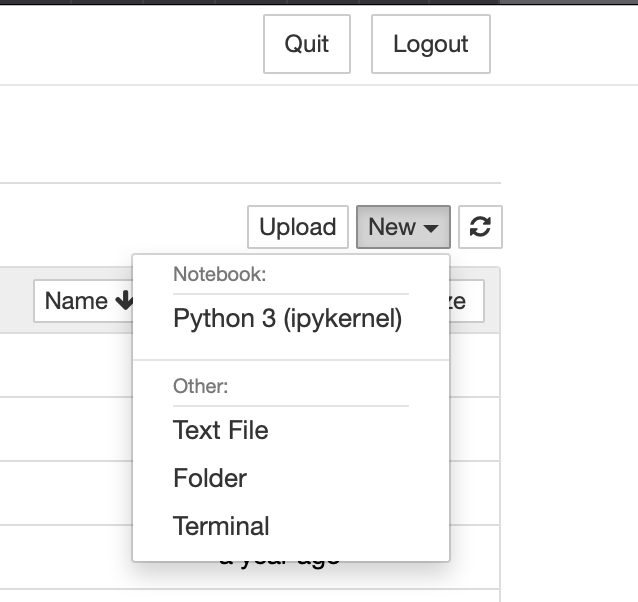

Note that there is only one Notebook option, and it's for a Python 3 kernel. It turns out that choosing this kernel will create and start a new notebook using the same Python environment that launched the Jupyter notebook server. It currently is a bare-bones Python virtual environment, with `jupyter` and all its dependencies installed in it. If you run a notebook using this kernel, it will have access to Python core libraries, but also will have the Jupyter dependencies installed.

### Dependencies
Let's say that you want to create two different notebooks. One might be for data analsysis and need pandas and numpy. The other might need to access a database and perform some calculations with the data. What are your options?

1. Install *all* the dependencies in the `kernels` virtualenv, then run the two notebooks.
1. Create the first notebook in the `kernels` virtualenv, then make *another* virtualenv for the second notebook.
1. Create a virtualenv for each notebook, but install them as kernels.

I'll walk through the three of these so you understand why each would work.

### All together
The first option, putting everything in one virtualenv makes a lot of sense for most use cases. You create a virtualenv for your project, install the jupyter tooling in it, and just `pip install` (or `conda install`) the dependencies you need. In many cases, this will work out fine. My guess is this is how most of us have done things.

### A virtualenv per notebook
This second option is really just the same as the first option, but you make a decision to separate virtual environments when you don't want to share dependencies. The one thing to note about this choice is that the Jupyter tooling (and its dependencies) are all a part of *both* virtualenvs.

### A kernel per notebook
This last option is different. By creating a virtualenv (and kernel) for specific use cases, you can have fine-grained control over dependencies. Why would we want this extra complexity?

1. Your notebooks have different versions required for the same dependency but you want to run one Jupyter instance. 
1. You want to run or test your code with multiple versions of Python (or multiple versions of dependencies). 
1. You are in a larger workgroup and run something like [JupyterHub](https://jupyter.org/hub) where multiple users share a server. Users require specific versions of dependencies and can't share one environment.

I'm sure you can think of more situations where this could be valuable. 

## How to add a kernel
Now we'll look at the process to add another kernel. As before, we'll create a virtualenv, but in this case I'll use a different version of Python and install different dependencies in it.

```
$ pyenv virtualenv 3.8.7 kernel-ds
$ pyenv activate kernel-ds
$ pip install pandas numpy
```

Now, we have the virtualenv, we need to add it as a kernel. Kernels can be installed for a single user, or system-wide. Note that you will want to pass in the `--name` and --`display-name` parameters so you can easily tell the difference between the kernels, and so you don't overwrite the existing kernel. 

```
$ python -m ipykernel install --name "ds" --display-name "Data Science Kernel"
```

To see the kernels available in your environment, you can list them
```
$ jupyter kernelspec list
Available kernels:
  python3    /Users/mcw/.pyenv/versions/3.10.4/envs/kernels/share/jupyter/kernels/python3
  ds         /usr/local/share/jupyter/kernels/ds
```

As you can see, there are now two kernels available. The kernel is described in a JSON file.

```
$ cat /usr/local/share/jupyter/kernels/ds/kernel.json
{
 "argv": [
  "/Users/mcw/.pyenv/versions/kernel-ds/bin/python",
  "-m",
  "ipykernel_launcher",
  "-f",
  "{connection_file}"
 ],
 "display_name": "Data Science Kernel",
 "language": "python",
 "metadata": {
  "debugger": true
 }
}
```

## How to use the kernel
You can now use the kernel by selecting it in the "New" dropdown in your Jupyter notebook environment. If you are using JupyterLab, it will show up in the available kernels for new notebooks. The new notebook uses the environment you selected.

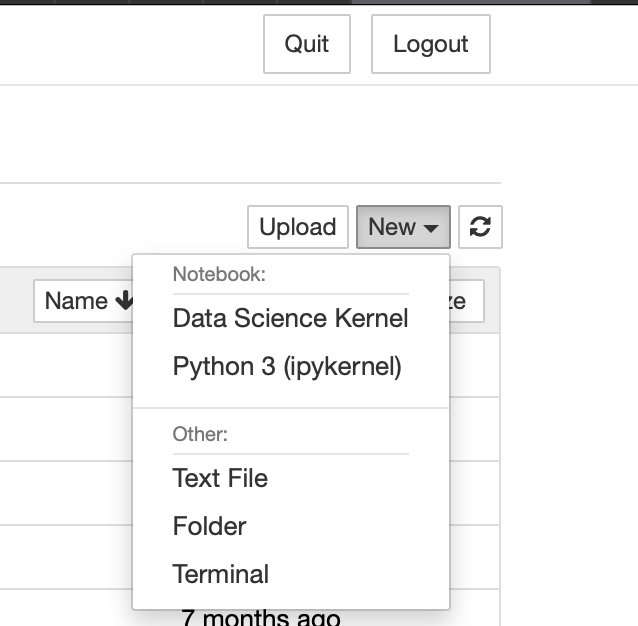

What does this look like on your workstation? One way to view this is via the unix `ps` command. This will list the processes running on your machine. Here's what it looks like for me after I started two new notebooks, one using each of the available kernels:

```
$ ps -e | grep python | grep -v grep # show all python processes, but filter out the grep command itself
  501 49397 49381   0  4:46PM ??         0:01.42 /Users/mcw/.pyenv/versions/kernel-ds/bin/python -m ipykernel_launcher -f /Users/mcw/Library/Jupyter/runtime/kernel-b021fef2-b947-4cdd-8448-4caf1df085dc.json
  501 49403 49381   0  4:46PM ??         0:00.76 /Users/mcw/.pyenv/versions/3.10.4/envs/kernels/bin/python3.10 -m ipykernel_launcher -f /Users/mcw/Library/Jupyter/runtime/kernel-ac0c95a1-5527-4df2-9448-1435e4d16636.json
  501 49381 43796   0  4:46PM ttys004    0:02.16 /Users/mcw/.pyenv/versions/3.10.4/envs/kernels/bin/python3.10 /Users/mcw/.pyenv/versions/kernels/bin/jupyter-notebook --no-browser
```

The second column is the process id, the third is the parent process id. You can see the last process (pid 49381) is the jupyter-notebook process itself. It's running out of the `kernels` virtualenv. The other two processes (49397, 49403) both have the same parent pid, but are using two different virtualenvs to run their kernels. 

## Gotchas
Before we wrap up, I want to point out a few gotchas that I noticed.

First, if you create a kernel with the `--user` option that is the same name as one that is globally installed, the user version seems to take precedence and hides the global option. It's important if you use this tool to be smart about naming conventions so that you don't end up getting confused about where your dependcies are installed.

Second, adding other kernel types is one more variable to consider in troubleshooting issues and can cause some extra confusion. Even in just creating these examples, I got mixed up a few times. You can probably get away with just using virtualenvs to keep track of dependencies for many simple setups, but for many situations, having multiple kernels is a very elegant solution. Maybe you can use this in your environment.